In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/NautralSciences_Dataset.csv")
data.info()

C:\Users\chris\AppData\Local\Temp\ipykernel_17696\313727318.py:1: DtypeWarning: Columns (10,11,12,18,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/NautralSciences_Dataset.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937972 entries, 0 to 937971
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OBJECTID                    937972 non-null  int64  
 1   FOD_ID                      937972 non-null  int64  
 2   FPA_ID                      937972 non-null  object 
 3   SOURCE_SYSTEM_TYPE          937972 non-null  object 
 4   SOURCE_SYSTEM               937972 non-null  object 
 5   NWCG_REPORTING_AGENCY       937972 non-null  object 
 6   NWCG_REPORTING_UNIT_ID      937972 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME    937972 non-null  object 
 8   SOURCE_REPORTING_UNIT       937972 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME  937972 non-null  object 
 10  LOCAL_FIRE_REPORT_ID        212814 non-null  object 
 11  LOCAL_INCIDENT_ID           446908 non-null  object 
 12  FIRE_CODE                   196422 non-null  object 
 13  FIRE_NAME     

In [4]:
# grouped by cause
cause_groups = data[["STAT_CAUSE_DESCR", "FIRE_SIZE"]].groupby(["STAT_CAUSE_DESCR"]).mean().reset_index()
cause_groups

,STAT_CAUSE_DESCR,FIRE_SIZE
0,Arson,35.791817
1,Campfire,58.139233
2,Children,10.019848
3,Debris Burning,15.094410
4,Equipment Use,44.222481
5,Fireworks,24.030776
6,Lightning,345.154839
7,Miscellaneous,44.664103
8,Missing/Undefined,48.760338
9,Powerline,75.538080


In [5]:
by_state = data[["STATE", "FIRE_SIZE"]].groupby(["STATE"]).mean().reset_index()
by_state

,STATE,FIRE_SIZE
0,AK,3687.001544
1,AL,14.810229
2,AR,16.916042
3,AZ,90.626053
4,CA,79.030878
5,CO,59.404233
6,CT,2.016649
7,DC,0.245455
8,DE,18.133962
9,FL,53.808113


<Axes: xlabel='fire_date', ylabel='FIRE_SIZE'>

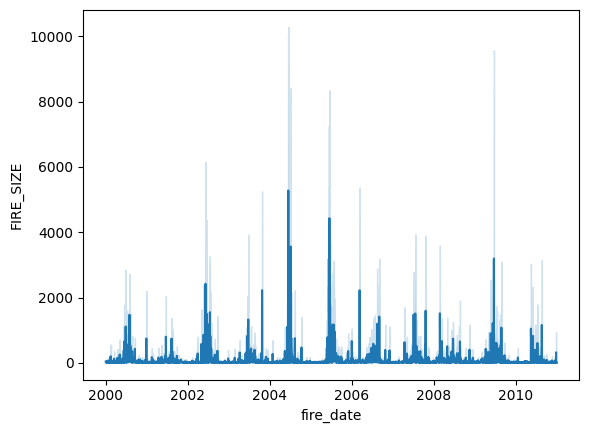

In [6]:
data["fire_date"] = pd.to_datetime(data['FIRE_YEAR'] * 1000 + data['DISCOVERY_DOY'], format='%Y%j')

sns.lineplot(
    data=data,
    x="fire_date",
    y="FIRE_SIZE"
)

In [7]:
biggest_in_each = data[["FIRE_SIZE", "STATE", "STAT_CAUSE_DESCR"]].groupby(["STATE", "STAT_CAUSE_DESCR"]).max()
# biggest_in_each.sort_values(by="FIRE_SIZE", ascending=False).head(10)
biggest_in_each.reset_index()

,STATE,STAT_CAUSE_DESCR,FIRE_SIZE
0,AK,Arson,189688.0
1,AK,Campfire,91885.0
2,AK,Children,100.0
3,AK,Debris Burning,118520.1
4,AK,Equipment Use,115328.0
...,...,...,...
606,WY,Missing/Undefined,9248.0
607,WY,Powerline,10361.0
608,WY,Railroad,3030.0
609,WY,Smoking,2432.0


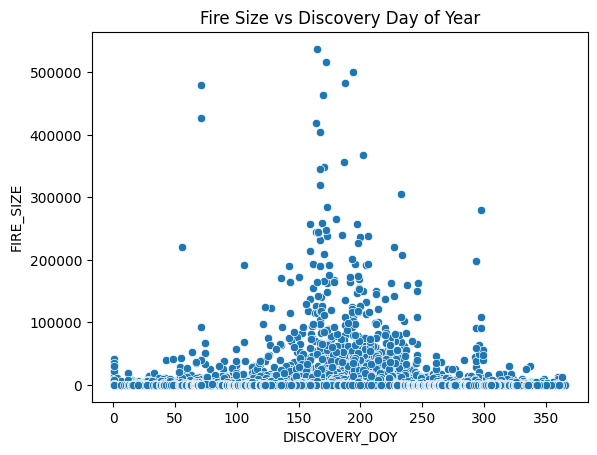

In [8]:
sns.scatterplot(
    data=data,
    x="DISCOVERY_DOY",
    y="FIRE_SIZE"
)
plt.title("Fire Size vs Discovery Day of Year");

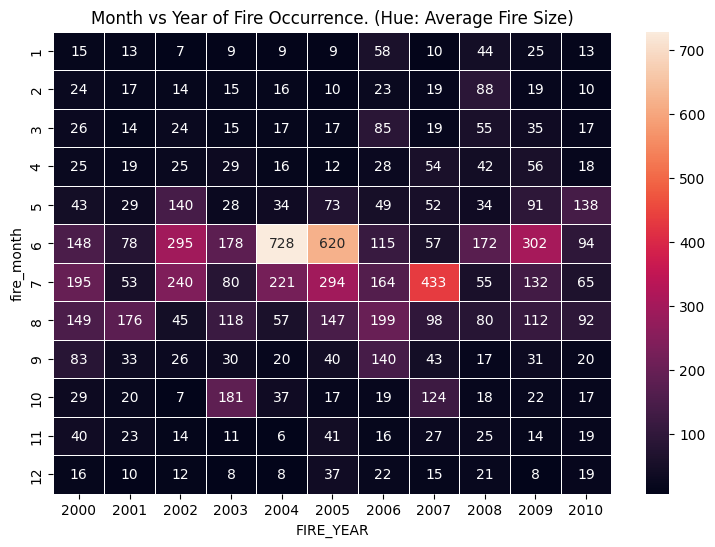

In [9]:
data['fire_month'] = data['fire_date'].dt.month
graph_data = data[["fire_month", "FIRE_YEAR", "FIRE_SIZE"]].groupby(["FIRE_YEAR", "fire_month"]).mean().reset_index()
pivoted_graph_data = graph_data.pivot(index="fire_month", columns="FIRE_YEAR", values="FIRE_SIZE")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivoted_graph_data, annot=True, fmt=".0f", linewidths=.5, ax=ax)
plt.title("Month vs Year of Fire Occurrence. (Hue: Average Fire Size)");

20.275284260921605


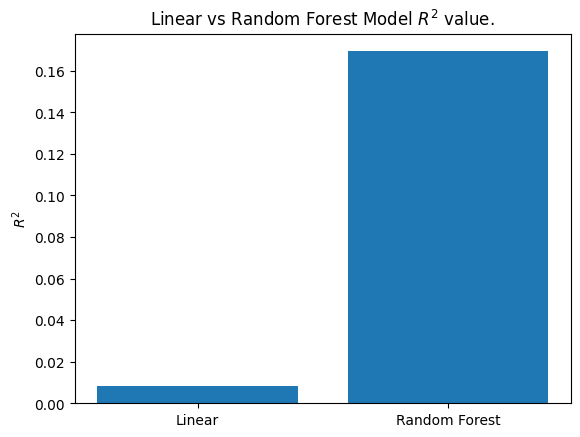

In [43]:
linear_r2 = 0.008355
model_r2 = 0.1694
plt.bar(x=["Linear", "Random Forest"], height=[linear_r2, model_r2])
plt.ylabel("$R^2$");
plt.title("Linear vs Random Forest Model $R^2$ value.");
print(model_r2/linear_r2)

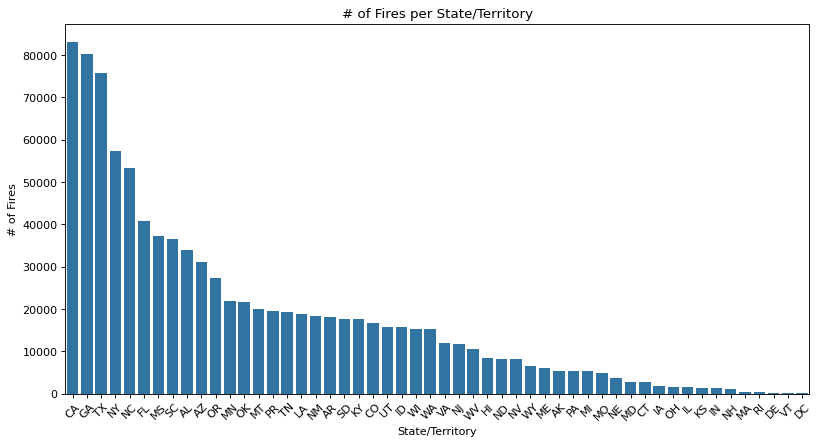

In [36]:
counted_states = data[["STATE"]].value_counts().reset_index()
plt.figure(figsize=(12, 6), dpi=80)
sns.barplot(
    data=counted_states,
    x="STATE",
    y="count",
)
plt.xticks(rotation=45)
plt.title("# of Fires per State/Territory")
plt.ylabel("# of Fires")
plt.xlabel("State/Territory");